In [87]:
from unfold_utils.plot_tools import AsymmetricErrorPlot

In [88]:
import pickle as pkl
import numpy as np
import matplotlib.pyplot as plt
import hist
import mplhep as hep

In [89]:
from IPython.display import Audio, display
import numpy as np

# A simple beep
framerate = 44100
t = np.linspace(0, 0.2, int(0.2 * framerate)) 
data = np.sin(2*0.5 * np.pi * 440 * t)  # 440 Hz = A note
display(Audio(data, rate=framerate, autoplay=True))

In [4]:
%load_ext autoreload

%autoreload 2

In [90]:
title_list = [ r"$p_T$ 200-290 GeV",  r"$p_T$ 290-400 GeV",  r"$p_T$ 400-$\infty$ GeV",  r"$p_T$ 480-$\infty$ GeV"]
color_pt = ["#1f77b4", "#d62728", "#2ca02c", "#ff7f0e"]
groomed = 0
hep.style.use("CMS")

In [6]:
if not groomed:
    with open("total_sys_pt_dic_ungroomed.pkl", "rb") as f:
        total_sys_pt_dic = pkl.load(f)

    with open("total_sys_down_pt_dic_ungroomed.pkl", "rb") as f:
        total_sys_down_pt_dic = pkl.load(f)
    with open("unfolded_result_ungroomed.pkl", "rb") as f:
        unfolded_result = pkl.load(f)
    
    with open("total_stat_ungroomed.pkl", "rb") as f:
        stat_mat = pkl.load(f)
    
    with open("pythia_gen_ungroomed.pkl", "rb") as f:
        pythia = pkl.load( f)
else:
    with open("total_sys_pt_dic_groomed.pkl", "rb") as f:
        total_sys_pt_dic = pkl.load(f)
    with open("total_sys_down_pt_dic_groomed.pkl", "rb") as f:
        total_sys_down_pt_dic = pkl.load(f)
    with open("unfolded_result_groomed.pkl", "rb") as f:
        unfolded_result = pkl.load(f)
    
    with open("total_stat_groomed.pkl", "rb") as f:
        stat_mat = pkl.load(f)
    
    with open("pythia_gen_groomed.pkl", "rb") as f:
        pythia = pkl.load( f)

In [7]:
if not groomed:
    with open("total_stat_ungroomed.pkl", "rb") as f:
            stat_mat = pkl.load(f)
            print("hi")
else:
    with open("total_stat_groomed.pkl", "rb") as f:
            stat_mat = pkl.load(f)

stat_mat[0].shape

hi


(9,)

In [8]:
np.array(list(stat_mat.values())).flatten()

array([0.00111892, 0.00240461, 0.001696  , 0.00089602, 0.00076403,
       0.00044022, 0.00028381, 0.00059481, 0.        , 0.00220015,
       0.00272524, 0.00122967, 0.00125285, 0.00123464, 0.00140919,
       0.00068418, 0.00044478, 0.00015503, 0.00350244, 0.00418369,
       0.00516288, 0.00382373, 0.00247479, 0.00130299, 0.00090994,
       0.00072817, 0.00026981])

In [8]:
if not groomed:
    edges_gen = np.array([ 20, 40, 60, 80, 100,
                          120, 140, 160, 200, 13000])
else:
    edges_gen = np.array([0, 10, 20, 40, 60, 80, 100,
                          120, 140, 160, 200, 13000])

# Compute bin widths
widths_gen = np.diff(edges_gen)

# Compute bin centers
centres_gen = (edges_gen[:-1] + edges_gen[1:]) / 2

In [9]:
if groomed:
    edges_gen_3 = np.array([0, 10, 20, 40, 80, 
                              120, 140, 160, 200, 13000])
    
    # Compute bin widths
    widths_gen_3 = np.diff(edges_gen_3)
    
    # Compute bin centers
    centres_gen_3 = (edges_gen_3[:-1] + edges_gen_3[1:]) / 2
else:
    edges_gen_3 = np.array([  20, 60, 80, 
                              120, 140, 160, 200, 13000])
    
    # Compute bin widths
    widths_gen_3 = np.diff(edges_gen_3)
    
    # Compute bin centers
    centres_gen_3 = (edges_gen_3[:-1] + edges_gen_3[1:]) / 2

In [9]:
x_data = [20, 40, 60, 80]
y_data = [100, 110, 120, 130]
y2_data = [101+20, 111+20, 121+20, 129+20]
x_widths = [20, 20, 20, 20]
stat_unc_up = [5, 5, 5, 5]
stat_unc_down = stat_unc_up
up = [10, 10, 10 , 10]
down = [10, 10, 10, 10]

In [10]:
plotter = AsymmetricErrorPlot()
plotter.add_data_points(x_data=x_data , y_data=y_data, y2_data=y2_data, x_widths=x_widths, y3_data = None)
plotter.add_stat_unc(stat_unc_up, stat_unc_down)
plotter.add_syst_unc(up, down)

4
4


In [91]:
stat = np.loadtxt("stat_input_ungroomed.txt")


In [92]:
file_path = 'unfolding_data_ungroomed.pkl'

with open(file_path, 'rb') as file:
    loaded_data = pkl.load(file)

In [93]:
edges = np.array(loaded_data[0]['mgen_edges'])
print(edges)
edges_custom = edges.copy()
edges_custom [-1] =  100
centers = 0.5 * (edges_custom[1:] + edges_custom[:-1])
np.diff(edges_custom)

[   20    40    60    80 13000]


array([20, 20, 20, 20])

In [94]:
loaded_data[0]

{'true': array([1.82540590e-02, 1.96277346e-02, 8.43653904e-03, 5.69917543e-06]),
 'unfolded': array([2.07448787e-02, 1.82128271e-02, 7.52027196e-03, 5.45204684e-06]),
 'unfolded_err': array([9.96962600e-05, 1.21385181e-04, 7.33916548e-05, 5.79929663e-08]),
 'measured': array([2.29878570e-02, 2.65880097e-02, 1.90216715e-02, 1.19778222e-02,
        7.57878836e-03, 4.97132328e-03, 2.66286800e-03, 1.20061390e-06]),
 'reco_mc': array([2.00084303e-02, 2.66439400e-02, 1.93392662e-02, 1.26650620e-02,
        8.48272163e-03, 5.56373101e-03, 2.79658569e-03, 1.32068024e-06]),
 'pt_bin': (200, 290),
 'mgen_edges': [20, 40, 60, 80, 13000],
 'syst_unc': {'up': array([2.39567152e-03, 2.77483516e-03, 1.51647581e-04, 9.88744101e-07]),
  'down': array([2.40030053e-03, 2.77732758e-03, 1.50684327e-04, 9.87708932e-07])}}

0
[   20    40    60    80 13000]
4
4
widths before [ 20  20  20 170]
widths after [20 20 20 20]
masses len 4
 len values_data 4
xtick labels ['20', '', '60', 80, '$\\infty$']
Ratio [0.87993086 1.07768742 1.12183962 1.04532767]
Stat Ratio [0.00153346 0.00259933 0.00648152 0.11820909]
Ratio Total Unc [0.11549273 0.15237826 0.02118122 0.21647687]
1
[   20    40    60    80   100 13000]
5
5
widths before [20 20 20 20 50]
widths after [20 20 20 20 20]
masses len 5
 len values_data 5
xtick labels ['20', '', '60', '', 100, '$\\infty$']
Ratio [0.97666512 1.01104019 1.02730582 1.01760513 0.92160571]
Stat Ratio [0.00923388 0.00641759 0.00569174 0.01244191 0.11077171]
Ratio Total Unc [0.06961033 0.02654818 0.16204196 0.06439206 0.36144068]
2
[   20    40    60    80   100   150   200 13000]
7
7
widths before [20 20 20 20 50 50 50]
widths after [20 20 20 20 50 50 50]
masses len 7
 len values_data 7
xtick labels ['20', '', '60', '', '100', '', 200, '$\\infty$']
Ratio [0.65653945 1.07392898 0.90861

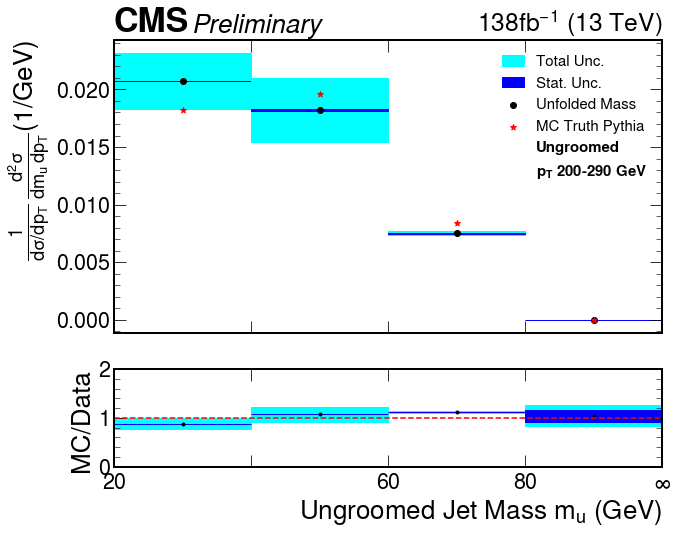

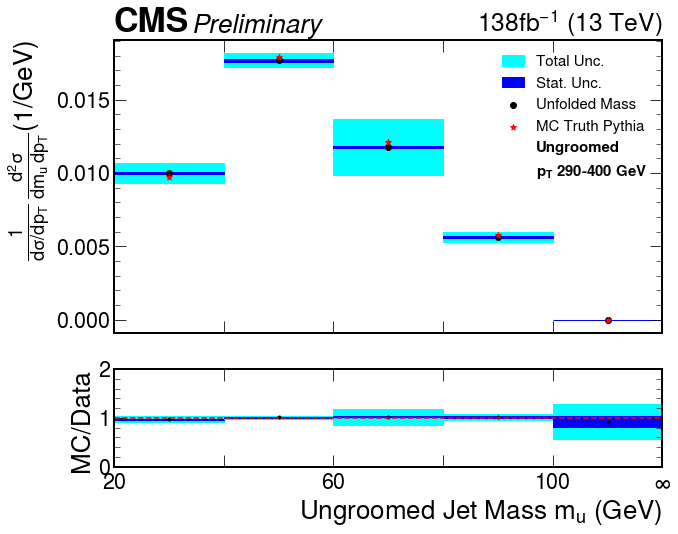

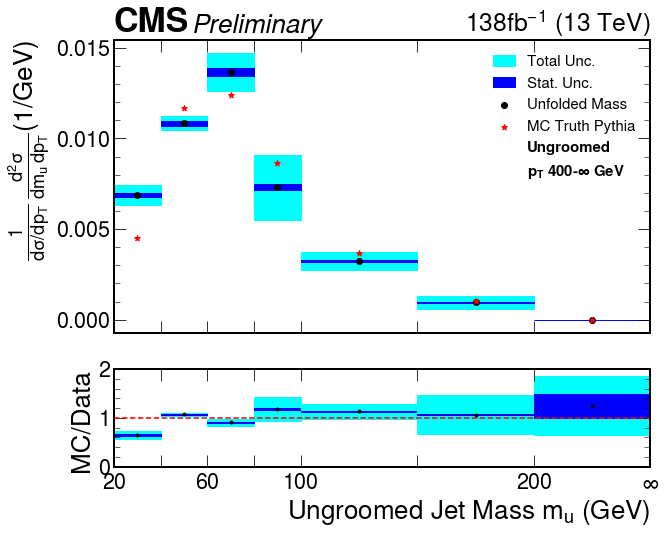

In [98]:
import json
hep.style.use("CMS")
data_list = []
dic_list = []
for ipt in range(3):
    print(ipt)

    edges = np.array(loaded_data[ipt]['mgen_edges'])
    print(edges)
    
    edges_custom = edges.copy()
    if ipt == 0:
        edges_custom [-1] =  100
    if ipt == 1:
        edges_custom[-1] = 150
    else:
        edges_custom[-1] = 250
    centers = 0.5 * (edges_custom[1:] + edges_custom[:-1])
    x_data = centers

    y_data = loaded_data[ipt]['true']
    y2_data = loaded_data[ipt]['unfolded']
    x_widths = np.diff(edges_custom)
    x_widths_custom = x_widths.copy()
    x_widths_custom[-1] = 1000 - x_widths[-2]
    stat_unc_up = stat[ipt][:len(x_widths)]/x_widths_custom
    stat_unc_down = stat[ipt][:len(x_widths)]/x_widths_custom
    up = loaded_data[ipt]['syst_unc']['up']
    down = loaded_data[ipt]['syst_unc']['down']

    plotter = AsymmetricErrorPlot()
    plotter.add_data_points(x_data=x_data , y_data=y_data, y2_data=y2_data, x_widths=x_widths, y3_data = None)
    plotter.add_stat_unc(stat_unc_up, stat_unc_down)
    plotter.add_syst_unc(up, down)
    if groomed:
        custom_text = 'Groomed'
        xlabel = "Groomed Jet Mass $m_{g}$ (GeV)"
        ylabel=r'$\frac{1}{d\sigma/dp_{T}} \, \frac{d^2 \sigma}{dm_{g} \, dp_{T}}$ (1/GeV)'
    else:
        custom_text  = 'Ungroomed'
        xlabel = "Ungroomed Jet Mass $m_{u}$ (GeV)"
        ylabel=r'$\frac{1}{d\sigma/dp_{T}} \, \frac{d^2 \sigma}{dm_{u} \, dp_{T}} (1/GeV)$'
        
    ax1, ax2, fig = plotter.plot(ylabel=ylabel, xlabel = xlabel ,custom_text=custom_text,pt_text= title_list[ipt])
    if not groomed:
        ax1.set_xlim(20,edges_custom[-1])
        #ax1.set_ylim(0,240)
        ax2.set_ylim(0,2)
        if ipt ==0:
            ax1.set_xlim(20,100)
        if ipt == 1:
            ax1.set_xlim(20,120)
        plt.tight_layout()
        fig.savefig(f'plots/results/ungroomed_{ipt}.pdf')

    else:
        ax1.set_xlim(10,edges_custom[-1])
        if ipt ==0:
            ax1.set_xlim(10,120)
        
        ax1.set_ylim(0,0.02)
        ax2.set_ylim(0,2)
        plt.tight_layout()
        fig.savefig(f'plots/results/groomed_{ipt}.pdf')
    data_list.append([edges_custom, y2_data, stat_unc_up, up, down, y_data])

    out_dic = {"edges": edges_custom, "data": y2_data, "stat": stat_unc_up, "syst_up": up, "syst_down": down, "mc":y_data, "centers": x_data, "widths": x_widths}
    dic_list.append(out_dic)
    import pickle


    if groomed:

        with open(f"hepdata/inputs/groomed_{ipt}.pkl", "wb") as f:
            pkl.dump(out_dic, f)
    else:
        with open(f"hepdata/inputs/ungroomed_{ipt}.pkl", "wb") as f:
            pkl.dump(out_dic, f)

In [75]:

# ipt = 3
# sum_i = unfolded_result[ipt].sum()
# x_data = centres_gen_3
# y_data = pythia[ipt]/widths_gen_3/pythia[ipt].sum()
# y2_data = unfolded_result[ipt]/widths_gen_3/sum_i
# x_widths = widths_gen_3
# stat_unc_up = stat_mat[ipt]/widths_gen_3/sum_i
# stat_unc_down = stat_mat[ipt]/widths_gen_3/sum_i
# up = total_unc_up[ipt]/widths_gen_3/sum_i
# down =  total_unc_down[ipt]/widths_gen_3/sum_i

# plotter = AsymmetricErrorPlot()
# plotter.add_data_points(x_data=x_data , y_data=y_data, y2_data=y2_data, x_widths=x_widths, y3_data = None)
# plotter.add_stat_unc(stat_unc_up, stat_unc_down)
# plotter.add_syst_unc(up, down)
# if groomed:
#     custom_text = 'Groomed'
#     xlabel = "Groomed Jet Mass $m_{g}$ (GeV)"
#     ylabel=r'$\frac{1}{d\sigma/dp_{T}} \, \frac{d^2 \sigma}{dm_{g} \, dp_{T}}$ (1/GeV)'
# else:
#     custom_text  = 'Ungroomed'
#     xlabel = "Ungroomed Jet Mass $m_{u}$ (GeV)"
#     ylabel=r'$\frac{1}{d\sigma/dp_{T}} \, \frac{d^2 \sigma}{dm_{u} \, dp_{T}} (1/GeV)$'
    
# ax1, ax2, fig = plotter.plot(ylabel=ylabel, xlabel = xlabel ,custom_text=custom_text,pt_text= title_list[ipt])
# if not groomed:
#     ax1.set_xlim(20,240)
#     ax2.set_ylim(0,2)
#     fig.savefig(f'plots/results/ungroomed_{ipt}.pdf')
# else:
#     ax1.set_xlim(10,240)
#     ax1.set_ylim(0,0.02)
#     ax2.set_ylim(0,2)
#     fig.savefig(f'plots/results/groomed_{ipt}.pdf')
# edges_gen_3[-1] = 240
# data_list.append([edges_gen_3, y2_data, stat_unc_up, up, down, y_data])

In [76]:
out_dic

{'edges': array([  0,  10,  20,  40,  60, 100, 150, 200, 250]),
 'data': array([3.92064528e-02, 1.57919566e-02, 6.41829663e-03, 3.94197948e-03,
        2.68251215e-03, 1.61183277e-03, 7.95284316e-04, 1.18390960e-06]),
 'stat': array([2.20836947e-04, 2.13631793e-04, 7.19904203e-05, 4.10114836e-05,
        2.30123804e-05, 1.64185897e-05, 2.64207341e-05, 5.99145120e-07]),
 'syst_up': array([4.38248959e-04, 3.25817131e-03, 8.03194250e-04, 1.45315484e-04,
        2.30155714e-04, 4.71742434e-04, 2.07881735e-04, 6.37614794e-07]),
 'syst_down': array([4.28370768e-04, 3.25773152e-03, 8.03749184e-04, 1.44771201e-04,
        2.30600720e-04, 4.72170225e-04, 2.07499986e-04, 6.38218285e-07]),
 'mc': array([4.06923222e-02, 1.12715457e-02, 6.76765146e-03, 4.50679100e-03,
        2.70341186e-03, 1.79944620e-03, 8.05620335e-04, 1.28770859e-06]),
 'centers': array([  5.,  15.,  30.,  50.,  80., 125., 175., 225.]),
 'widths': array([10, 10, 20, 20, 40, 50, 50, 50])}

[  5.  15.  30.  50.  70.  90. 220.]
[ 10  10  20  20  20  20 150]
[  5.  15.  30.  50.  70.  90. 220.]
[6.38946104e-05 7.88801993e-05 2.30765996e-05 2.28470880e-05
 2.71375020e-05 4.86601192e-05 4.57051404e-07]
[  5.  15.  30.  50.  70.  90. 125. 220.]
[10 10 20 20 20 20 50  0]
[  5.  15.  30.  50.  70.  90. 125. 220.]
[1.45125680e-03 1.64527532e-03 4.11086867e-04 2.94066112e-04
 6.57004568e-04 6.46074086e-04 2.54544009e-04 5.93529936e-06]
[  5.  15.  30.  50.  80. 125. 175. 220.]
[10 10 20 20 40 50 50 50]
[  5.  15.  30.  50.  80. 125. 175. 220.]
[2.20836947e-02 2.13631793e-02 7.19904203e-03 4.10114836e-03
 2.30123804e-03 1.64185897e-03 2.64207341e-03 5.99145120e-05]


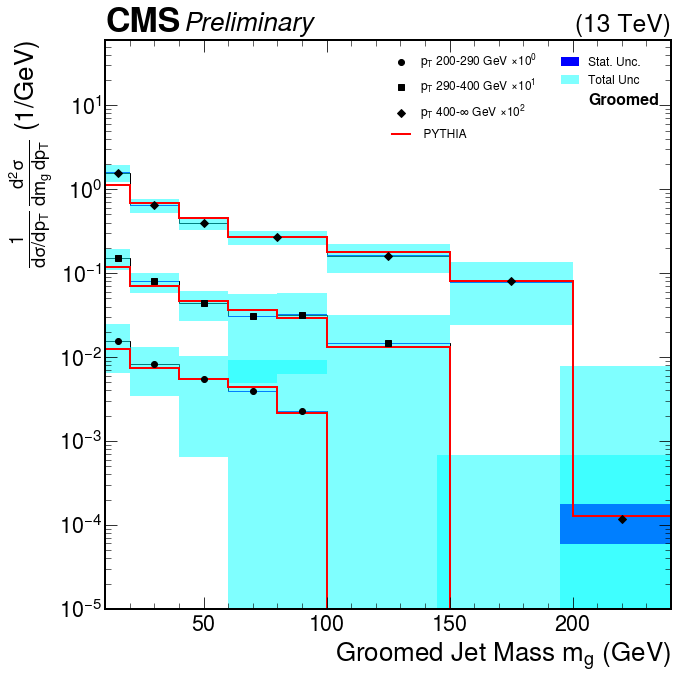

In [86]:
markers = ['o', 's', 'D', '^', 'v']
ipt = 0 
for i in range(3):
    x_data = dic_list[i]['centers']
    widths = dic_list[i]['widths']

    if i == 3:
        x_data = centres_gen_3
#widths = resp_matrix_4d.axes['mgen'].widths
        widths = widths_gen_3
        

    #widths[-1] = 40
    #x_data[-1] = 220
    print(x_data)
    print(widths)
    print(x_data)
    power_text = r'$\times 10^{{{}}}$'.format(i)
    pt_text =title_list[ipt] +' ' + power_text
    ipt = ipt + 1
    if i==232:
        plt.stairs(np.array(data_list[i][1][:-4])*(10**i), data_list[i][0][:-4], color = 'black' )
        plt.plot(x_data[:-4], np.array(data_list[i][1][:-4])*(10**i), color = 'black' , lw = 0, marker = markers[i], label = pt_text)
    elif i==231:
        plt.stairs(np.array(data_list[i][1][:-3])*(10**i), data_list[i][0][:-3], color = 'black' )
        plt.plot(x_data[:-3], np.array(data_list[i][1][:-3])*(10**i), color = 'black' , lw = 0, marker = markers[i], label = pt_text)
        
    else:    
        plt.stairs(np.array(data_list[i][1])*(10**i), data_list[i][0], color = 'black' )   
            
        plt.plot(x_data, np.array(data_list[i][1])*(10**i), color = 'black' , lw = 0, marker = markers[i], label = pt_text)
    plt.xlim(0,100)
    plt.yscale('log')
    plt.ylim(10**-5, 60)
    if groomed:
        plt.xlim(10, 240)
    else:
        plt.xlim(10, 240)
    plt.ylim()
    if groomed:
        custom_text = r'Groomed'
        xlabel = "Groomed Jet Mass $m_{g}$ (GeV)"
        ylabel=r'$\frac{1}{d\sigma/dp_{T}} \, \frac{d^2 \sigma}{dm_{g} \, dp_{T}}$ (1/GeV)'
    else:
        custom_text  = r'Ungroomed'
        xlabel = "Ungroomed Jet Mass $m_{u}$ (GeV)"
        ylabel=r'$\frac{1}{d\sigma/dp_{T}} \, \frac{d^2 \sigma}{dm_{u} \, dp_{T}} (1/GeV)$'
    plt.xlabel(xlabel)
    plt.ylabel( ylabel)
    
    sys_up = np.array(data_list[i][3])*10**i 
    sys_down = np.array(data_list[i][4])*10**i 
    tot_up = np.sqrt(np.array(sys_up)**2 + np.array(data_list[i][2])*10**i)
    tot_down = np.sqrt(np.array(sys_up)**2 + np.array(data_list[i][2])*10**i)

    if i ==33:
        plt.bar(x_data[:], # x
            2*np.array(data_list[i][2][:])*10**i, # heights
            #alpha=0.5, # half transparency
            bottom=(np.array(data_list[i][1][:])*(10**i)) - (np.array(data_list[i][2][:])*(10**i)), color='b',  width=widths[:], label='Stat. Unc.')
        print(np.array(data_list[i][2][:])*10**i)
        plt.bar(x_data[:-4], # x
            tot_up[:-4] + tot_down[:-4], # heights
            alpha=0.5, # half transparency
            bottom=(np.array(data_list[i][1][:-4])*(10**i)) - tot_down[:-4], color = 'cyan', width=widths[:-4], label='Total Unc')
    elif i ==33:
        idx = 3
        plt.bar(x_data[:-idx], # x
            2*np.array(data_list[i][2][:-idx])*10**i, # heights
            #alpha=0.5, # half transparency
            bottom=(np.array(data_list[i][1][:-idx])*(10**i)) - (np.array(data_list[i][2][:-idx])*(10**i)), color='b',  width=widths[:-idx], label='Stat. Unc.')
        print(np.array(data_list[i][2][:-idx])*10**i)
        plt.bar(x_data[:-idx], # x
            tot_up[:-idx] + tot_down[:-idx], # heights
            alpha=0.5, # half transparency
            bottom=(np.array(data_list[i][1][:-idx])*(10**i)) - tot_down[:-idx], color = 'cyan', width=widths[:-idx], label='Total Unc')
    else:
        plt.bar(x_data, # x
            2*np.array(data_list[i][2])*10**i, # heights
            #alpha=0.5, # half transparency
            bottom=(np.array(data_list[i][1])*(10**i)) - (np.array(data_list[i][2])*(10**i)), color='b',  width=widths, label='Stat. Unc.')
        print(np.array(data_list[i][2])*10**i)
        plt.bar(x_data, # x
            tot_up + tot_down, # heights
            alpha=0.5, # half transparency
            bottom=(np.array(data_list[i][1])*(10**i)) - tot_down, color = 'cyan', width=widths, label='Total Unc')
for i in range(3):  
    if i == 233:
        idx = 4
        plt.stairs(np.array(data_list[i][5][:-idx])*(10**i), data_list[i][0][:-idx], color = 'red', label = ' PYTHIA', lw = 2  )
    elif i == 231:
        idx = 3
        plt.stairs(np.array(data_list[i][5][:-idx])*(10**i), data_list[i][0][:-idx], color = 'red', label = ' PYTHIA', lw = 2  )
    else:

        plt.stairs(np.array(data_list[i][5][:])*(10**i), data_list[i][0][:], color = 'red', label = ' PYTHIA', lw = 2  )
handles, labels = plt.gca().get_legend_handles_labels()
        
handles.append(plt.Line2D([0], [0], color='none', label=custom_text))
handles.append(plt.Line2D([0], [0], color='none', label=custom_text))
labels.append(custom_text)


# Add legend with the custom entry
hep.cms.label("Preliminary", data = 1,)
by_label = dict(zip(labels, handles))
leg = plt.legend(by_label.values(), by_label.keys(), fontsize = 12, ncol = 2, loc = 'upper right')
leg.get_texts()[-1].set_fontweight('bold')
leg.get_texts()[-1].set_fontsize(16)

if groomed:
    plt.tight_layout()
    plt.savefig("plots/results/groomed_summary.pdf")
else:
    plt.tight_layout()
    plt.savefig("plots/results/ungroomed_summary.pdf")

In [16]:
len(data_list)

3

In [17]:
10*10

100

In [18]:
20*10

200